In [1]:
from fastai.basics import *

In [2]:

n=100

In [3]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.9987,  1.0000],
        [ 0.7157,  1.0000],
        [-0.1365,  1.0000],
        [ 0.9024,  1.0000],
        [-0.0912,  1.0000]])

In [4]:
a = tensor(3.,2); a

tensor([3., 2.])

In [5]:
y = x@a + 0.25*torch.randn(n)

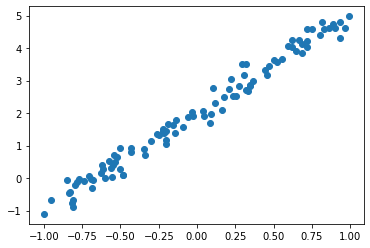

In [6]:
plt.scatter(x[:,0], y);

In [7]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [8]:
a = tensor(-1.,1)

In [9]:
y_hat = x@a
mse(y_hat, y)

tensor(6.0673)

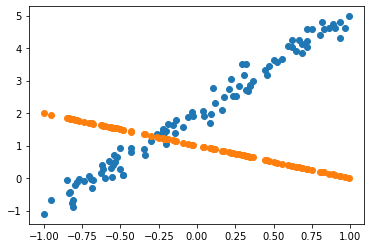

In [10]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

## Gradient Descent

In [11]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [12]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [13]:
lr = 1e-1
for t in range(100): update()

tensor(6.0673, grad_fn=<MeanBackward0>)
tensor(1.4509, grad_fn=<MeanBackward0>)
tensor(0.4298, grad_fn=<MeanBackward0>)
tensor(0.1584, grad_fn=<MeanBackward0>)
tensor(0.0856, grad_fn=<MeanBackward0>)
tensor(0.0661, grad_fn=<MeanBackward0>)
tensor(0.0609, grad_fn=<MeanBackward0>)
tensor(0.0595, grad_fn=<MeanBackward0>)
tensor(0.0591, grad_fn=<MeanBackward0>)
tensor(0.0590, grad_fn=<MeanBackward0>)


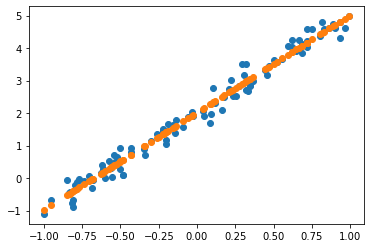

In [14]:

plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach());

In [15]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [16]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)